              precision    recall  f1-score   support

          No       0.82      0.88      0.85       272
         Yes       0.78      0.69      0.73       174

    accuracy                           0.80       446
   macro avg       0.80      0.78      0.79       446
weighted avg       0.80      0.80      0.80       446



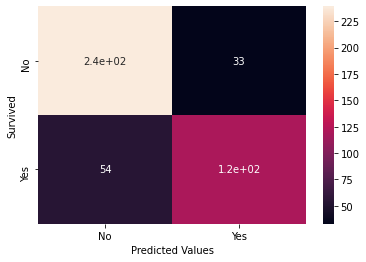

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import (classification_report,roc_curve)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv("titanic.csv")
data = data.drop("Unnamed: 0", axis = 1)

for i in ["Title","Sex"]:
    lbl = LabelEncoder()
    lbl.fit(data[i])
    data[i] = lbl.transform(data[i])

x = data[["Sex","Title","FamilySize","Age"]]
y = data["Survived"]

lg = LogisticRegression()

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.5)
lg.fit(x_train,y_train)
prediction = lg.predict(x_test)

mtrx = pd.crosstab(y_test,prediction, colnames =["Predicted Values"])
sns.heatmap(mtrx,annot = True)
print(classification_report(y_test,prediction))

<font color="red" size ="3"> Validation of the model </font>

This Confusion matrix tells us that this model has made <b> 260 correct predictions </b> for the case of non-Survival of certain individuals and <b> 120 correct predictions </b> for the case of the survival of certain individuals, and those numbers are significantly high compared to the uncorrect predictions that the model made such as <b> 39 uncorrect predictions </b> regarding the non-survival of certain individuals and <b> 53 uncorrect predictions </b> regarding the survival of certain individuals.

The metrics got through the classification_report method also tells about the performance of the model such as an <b> accuracy of predictions of 0.79 </b> , a <b> precision of 0.82 </b> and a <b> recall of 0.86 </b> regarding the predictions of non-survival of certain individuals, a <b> precision of 0.75 </b> and a <b> recall of 0.69 </b> regarding the survival of certain individuals.

<font color="red" size = "3"> ROC and AUC </font>

To have a better interpretation on  the ploting of a Logisitic Regression we need to determine which <b> threshold </b> (limit in which we differentiate a category of value to another category of value) is the best. For this classification problem we use the <b> AUC-ROC Curve </b> which tells us how much a model is capable of <b> distinguishing classes </b> and in which ROC is a curve which traces the values of the <b> rate of false and true positives </b> and <b> AUC </b> is the <b> area under this curve </b> and it gives a <b> mesure of the performances </b> with all of the possibles thresholds, and more the value of AUC (Which is located between 1 and 0 (Which are included)) is <b> higher then better </b> is the model at predicting values :

For example if a model has made only correct predictions then its AUC has a value of 1. <br/>
For information the rate of False and True positives are respectively equivalent to :

FPR = FP/(FP + TN) <br/>
RTP/Sensitivity = TP/(TP + FN)

Where FP is equivalent to False Positives, RN is equivalent to True Negatives, RP is equivalent to True Positives and FN is equivalent to False Negatives. <br/>
Through this ROC graph we can determine the <b> best threshold </b> which is the closest one to the point (0,1).

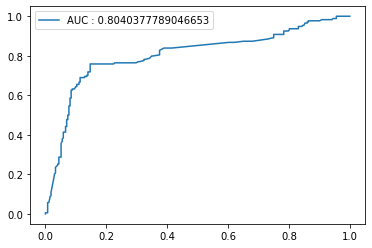

In [10]:
predictions_prob = lg.predict_proba(x_test)[::,1]
lbl_encd = LabelEncoder()
lbl_encd.fit(y_test)
y_test =  lbl_encd.transform(y_test)
fpr,tpr, n = metrics.roc_curve(y_test,predictions_prob)
auc = metrics.roc_auc_score(y_test,predictions_prob)
plt.plot(fpr,tpr,label=("AUC : "+ str(auc)))
plt.legend()

For this particular ROC-AUC Curve we can say that the <b> optimal threshold </b> has been used to generate the closest point to the (0,1) point which in this case has coordinates of approximately <b> (0.2,0.8)</b>. And the value of AUC tells us that the model made <b> 80% approximtaly correct predictions </b> out of all his predictions.